# 3. Control Flows

In [1]:
import numpy as np

import seaborn as sns

## Exercises

### If

Exercise 1

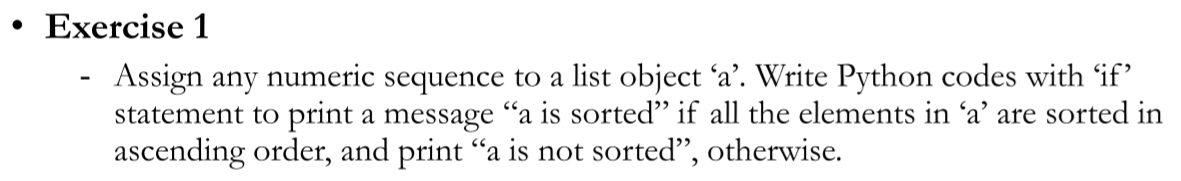

In [2]:
a = [6, 2, 3, 8]
b = [1, 2, 3, 4]

In [3]:

if a == sorted(a, reverse=False):
    print('It is sorted in ascending order')
else:
    print('It is not sorted in ascending order')

It is not sorted in ascending order


In [4]:

if b == sorted(b, reverse=False):
    print('It is sorted in ascending order')
else:
    print('It is not sorted in ascending order')

It is sorted in ascending order


Exercise 2

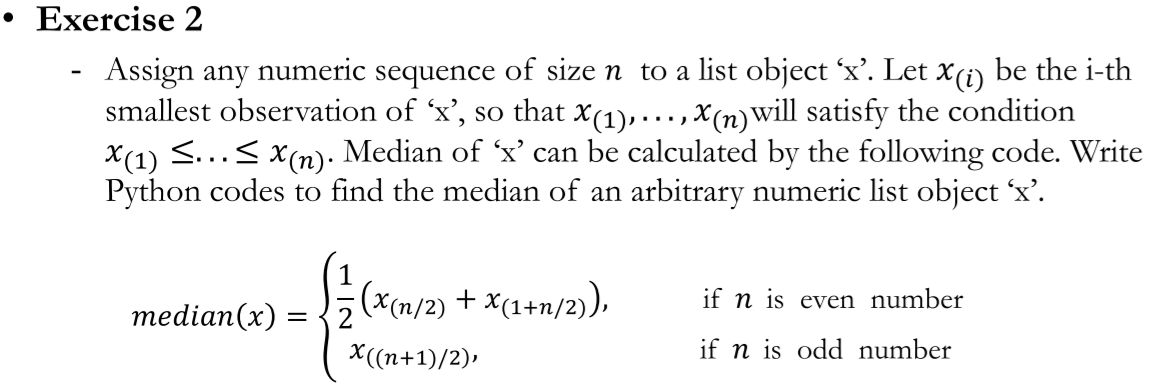

In [5]:
import random

n = 10
x = [random.randint(1, 100) for i in range(n)]


In [6]:
x

[99, 30, 83, 77, 58, 55, 90, 97, 18, 98]

In [7]:
def median(x):
    x = sorted(x, reverse=False)

    if n % 2 == 0:
        idx = int(n/2)
        return (x[idx] + x[idx + 1]) / 2
    else:
        return x[(n+1)/2]

In [8]:
median(x)

86.5

Exercise 7

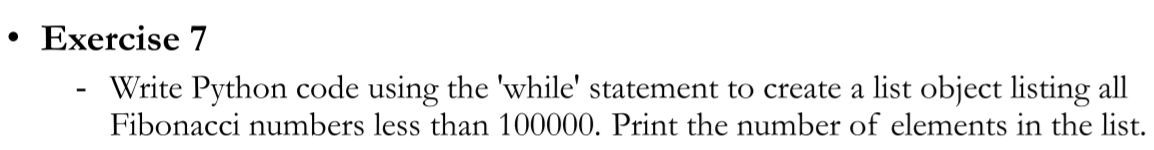

In [9]:
def fibonacci_while(n):
    n1 = 1
    n2 = 1
    fibo = [n1, n2]

    while n1 + n2 <= n:
        fibo.append(n1 + n2)
        n1, n2 = n2, n1 + n2

    return fibo

In [10]:
fibos = fibonacci_while(100000)
len(fibos)

25

In [11]:
fibos

[1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025]

European Call Option 예시

Monte Carlo simulation

In [12]:
import math
import random

In [13]:
S0 = 100. # initial stock price
K= 105. # strike price
T = 1. # time-to-maturity
r = 0.05 # riskless short rate
sigma = 0.2 # volatility
M = 50 # number of time steps
dt = T / M # length of time interval 이산화 하였을 때의 시간 간격
I = 250000 # number of paths

In [14]:
def generate_path():
    path = []

    for t in range(M+1):
        if t == 0:
            path.append(S0)
        else:
            z = random.gauss(0.0, 1.0)
            St = path[t-1] * math.exp((r-0.5*sigma**2)*dt + sigma * math.sqrt(dt)*z)
            path.append(St)
    
    return path

In [15]:
%%time

sum_val = 0.0

S = [generate_path() for i in range(I)]

CPU times: total: 9.48 s
Wall time: 9.72 s


In [16]:
sum_val = 0.
for path in S:
    sum_val += max(path[-1] - K, 0)

C0 = math.exp(-r * T)*sum_val/I
C0

8.072590546187037

In [17]:
S = np.array(S)

<Axes: >

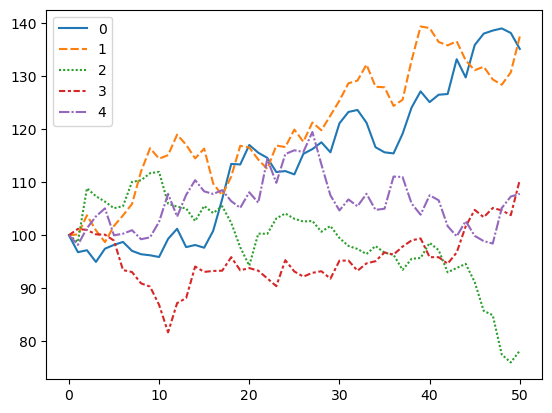

In [21]:
s = S[:5][:]

sns.lineplot(s.T)